# <div style="text-align:center; font-size:36px; font-weight:bold; color:#2874A6; text-shadow: 1px 1px 2px #000;">Spam Email Detection Project</div>

## **PHASE 5 PROJECT: GROUP 5**

### **Team Members:**
- **Kelvin Mwaura**  
- **Marion Achieng**  
- **Gerald Mwangi**  
- **Jackson Munene**
- **Benedict Kuloba**
---

## **Introduction**

In today's digital era, email continues to be a cornerstone of communication, bridging both personal and professional realms. Yet, the convenience of email also brings with it the persistent challenge of spam. These unsolicited messages not only crowd our inboxes but also present potential security threats. The importance of efficiently detecting and filtering spam emails cannot be overstated, as it directly impacts productivity and the protection of sensitive information. This project harnesses the power of machine learning to develop a robust spam email detection system.

---

## **Project Title: Spam Email Detection**



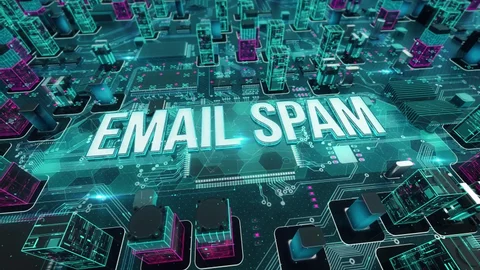

*Figure 1: This image visually represents the concept of email spam within a futuristic digital network, emphasizing the pervasive and interconnected nature of spam in modern communication.*

---

## **Overview:**

The **Spam-email-Detection** project aims to develop a machine learning model that accurately distinguishes between spam and legitimate emails. By utilizing various Python libraries and modules, this project not only detects spam but also offers an interactive user interface for easy access and operation through a web application.

---

## **Business Understanding:**

In a business environment, the ability to filter out spam emails efficiently can significantly reduce the risk of phishing attacks, malware, and other cyber threats. Moreover, it can enhance productivity by ensuring that employees spend less time sifting through unwanted emails. This project addresses a critical need in both personal and corporate settings by providing a reliable solution for spam detection.

---

## **Problem Statement:**

Spam emails are a pervasive issue, leading to decreased productivity and potential security breaches. Traditional filtering methods may not always be effective in catching sophisticated spam techniques. The challenge is to create a machine learning-based solution that can accurately detect and filter out spam emails in real-time, minimizing the risks associated with these unwanted messages.

---

## **Objectives:**

- **Develop** a machine learning model capable of accurately classifying emails as spam or non-spam.
- **Create** a user-friendly web application for easy deployment and access to the spam detection system.
- **Ensure** that the system is scalable and can handle large volumes of emails efficiently.
- **Provide** clear documentation and instructions for running and maintaining the system.

---

## **Data Understanding:**

Understanding the data is key to building an effective spam detection model. This project will use a dataset containing a large number of emails labeled as either spam or non-spam. Each email is represented by various features, including content, sender information, and other metadata, which will be used to train and test the model.

---

## **Dataset Overview:**

The dataset used in this project comprises emails labeled as either spam or non-spam. The dataset is pre-processed to extract relevant features that contribute to the model's decision-making process. These features are then used to train the machine learning model to distinguish between spam and legitimate emails.

---

## **Column Details:**

| **Column Name** | **Description** |
|-----------------|-----------------|
| **Email Text**  | The body of the email, which includes the actual content that will be analyzed for spam indicators. |
| **Subject**     | The subject line of the email, which often contains keywords that can be indicative of spam. |
| **Sender**      | Information about the sender, which can include the email address and domain, helping to identify known sources of spam. |
| **Metadata**    | Additional information about the email, such as timestamps, that can provide context for the model. |


---

#### Modules Used:

- **`Streamlit`**: An open-source Python library that facilitates the creation and sharing of custom web applications for machine learning and data science. It provides the framework for developing the user interface of the spam detection system.

- **`Pickle`**: A Python module used for serializing and deserializing Python object structures. In this project, Pickle is employed to save the trained machine learning model, allowing for easy storage and retrieval.

- **`String`**: A Python module containing utility functions for string manipulation, including the capitalization of words. This module is useful for preprocessing text data in the emails.

- **`nltk`**: The Natural Language Toolkit (nltk) is a Python package used for natural language processing (NLP). It is essential for analyzing the unstructured text data in the emails, such as tokenization, stemming, and other NLP tasks.

---

In [1]:
# Importing necessary libraries

# Data manupulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text cleaning
import string
import re

# NLP preprosessing
import nltk
from nltk.tokenize import  word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter


# TF-IDF vectorization instead of BOW
from sklearn.feature_extraction.text import TfidfVectorizer

# Classification models
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report, roc_curve, auc)
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jack\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jack\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Loading Data

In [3]:
#Class to load our data
class data_Loader:
    def __init__(self, path):
        self.path = path
        self.data = None

    def load_data(self):
        self.data = pd.read_csv(self.path, encoding='latin1')
        return self.data
    
    # call class
path = 'spam.csv'
data_loader = data_Loader(path)
df = data_loader.load_data()
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


### Data Preparation

It is going to be done into two steps:



1. **Text Cleaning**

Steps Followed:

**. Completeness:** Verify and address any missing values.

**. Consistency:** Identify and handle duplicate values.

**. Uniformity:** changing column names and clean text by removing punctuation and converting all text to lowercase.


2. **Text Processing**

Steps  followed:

**. Tokenization**

**. Removing stop words**

**. Normalization** Using Lemmatization


In [5]:
class data_Analyzer(data_Loader):
    def __init__(self, path):
        super().__init__(path)

    def clean_data(self):
        self.data.columns = ['label', 'message', 'col3', 'col4', 'col5']
        self.data = self.data.drop(['col3', 'col4', 'col5'], axis=1)
        self.data.dropna(inplace=True)
        return self.data

    def plot_distribution(self):
        plt.figure(figsize=(8, 6))
        sns.countplot(data=self.data, x='label', palette='Set2')
        plt.title('Distribution of Ham and Spam Messages', fontsize=16)
        plt.xlabel('Label', fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.show()

    def plot_message_length_distribution(self):
        self.data['message_length'] = self.data['message'].apply(len)
        plt.figure(figsize=(10, 6))
        sns.histplot(self.data[self.data['label'] == 'ham']['message_length'], kde=True, color='green', label='Ham', bins=30)
        sns.histplot(self.data[self.data['label'] == 'spam']['message_length'], kde=True, color='red', label='Spam', bins=30)
        plt.title('Distribution of Message Length', fontsize=16)
        plt.xlabel('Message Length', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.legend(fontsize=12)
        plt.show()

    def get_message_length_stats(self):
        self.data['message_length'] = self.data['message'].apply(len)
        ham_stats = self.data[self.data['label'] == 'ham']['message_length'].describe()
        spam_stats = self.data[self.data['label'] == 'spam']['message_length'].describe()
        return ham_stats, spam_stats

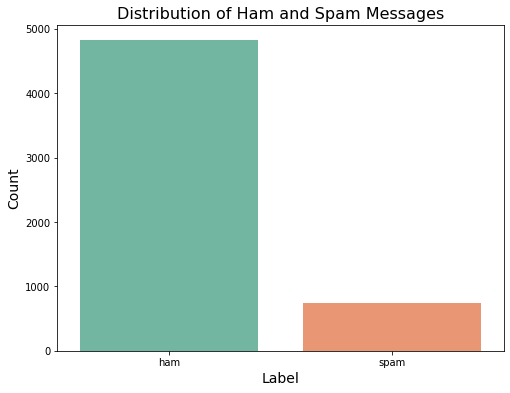

In [6]:
# call data analyzer
data_analyzer = data_Analyzer(path)
data = data_analyzer.load_data()
cleaned_data = data_analyzer.clean_data()
data_analyzer.plot_distribution()


## EDA
### Univeriate Analysis

#### **Bar Chart Analysis: Spam vs. Not Spam**

This bar chart visualizes the **distribution of emails** classified as "Spam" and "Not Spam" within our dataset.

#### **1. Ham (Green Bar)**
- **Count:** **4,800 emails**
- **Insight:** The majority of emails in our dataset fall into the "Not Spam" category, indicating that most of the emails are legitimate.

#### **2. Spam (Orange Bar)**
- **Count:** **800 emails**
- **Insight:** A smaller portion of emails is identified as "Spam," with this category being significantly less frequent than "Not Spam."

#### **Key Takeaways**
- **Imbalance in Data:** 
  - The dataset shows a significant imbalance, with "Not Spam" emails outnumbering "Spam" emails by a ratio of **6:1**.
  - **Implications for Modeling:** This imbalance is a critical consideration when developing machine learning models for spam detection, as it may influence the model's ability to correctly identify spam emails.


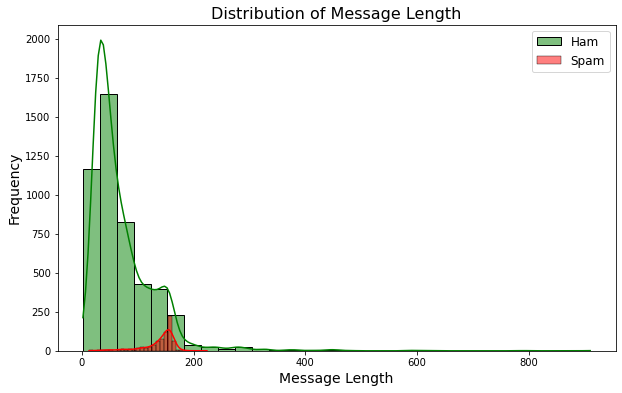

In [7]:
data_analyzer.plot_message_length_distribution()

In [8]:
ham_stats, spam_stats = data_analyzer.get_message_length_stats()
print("Ham Message Length Stats:\n", ham_stats)
print("\nSpam Message Length Stats:\n", spam_stats)

Ham Message Length Stats:
 count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: message_length, dtype: float64

Spam Message Length Stats:
 count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: message_length, dtype: float64


In [9]:
class AdvancedDataAnalyzer(data_Analyzer):
    def __init__(self, path):
        super().__init__(path)

    def clean_text(self, text):
        text = re.sub('<.*?>', '', text)
        text = re.sub('[^a-zA-Z]', ' ', text).lower()
        words = nltk.word_tokenize(text)
        words = [w for w in words if w not in stopwords.words('english')]
        stemmer = PorterStemmer()
        words = [stemmer.stem(w) for w in words]
        text = ' '.join(words)
        return text

    def preprocess_data(self):
        self.data['cleaned_message'] = self.data['message'].apply(self.clean_text)
        return self.data

    def generate_word_cloud(self, label, colormap='viridis', bg_color='white'):
        text = ' '.join(self.data[self.data['label'] == label]['cleaned_message'])
        wordcloud = WordCloud(width=800, height=400, background_color=bg_color, colormap=colormap).generate(text)
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {label.capitalize()} Messages', fontsize=20)
        plt.show()

    def get_top_words(self, label, n=10):
        text = ' '.join(self.data[self.data['label'] == label]['cleaned_message'])
        words = text.split()
        word_counts = Counter(words)
        return word_counts.most_common(n)

    def plot_top_words(self, label, n=10):
        top_words = self.get_top_words(label, n)
        words, counts = zip(*top_words)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(counts), y=list(words), palette='coolwarm')
        plt.title(f'Top {n} Words in {label.capitalize()} Messages', fontsize=20)
        plt.xlabel('Count', fontsize=14)
        plt.ylabel('Words', fontsize=14)
        plt.show()

    def plot_word_length_distribution(self):
        self.data['word_length'] = self.data['cleaned_message'].apply(lambda x: len(x.split()))
        plt.figure(figsize=(10, 6))
        sns.histplot(self.data[self.data['label'] == 'ham']['word_length'], kde=True, color='green', label='Ham', bins=30)
        sns.histplot(self.data[self.data['label'] == 'spam']['word_length'], kde=True, color='red', label='Spam', bins=30)
        plt.title('Distribution of Word Count per Message', fontsize=16)
        plt.xlabel('Word Count', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.legend(fontsize=12)
        plt.show()

    def plot_box_plots(self):
        self.data['message_length'] = self.data['message'].apply(len)
        self.data['word_length'] = self.data['cleaned_message'].apply(lambda x: len(x.split()))
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='label', y='message_length', data=self.data, palette='Set3')
        plt.title('Box Plot of Message Length by Label', fontsize=20)
        plt.xlabel('Label', fontsize=14)
        plt.ylabel('Message Length', fontsize=14)
        plt.show()
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='label', y='word_length', data=self.data, palette='Set2')
        plt.title('Box Plot of Word Count by Label', fontsize=20)
        plt.xlabel('Label', fontsize=14)
        plt.ylabel('Word Count', fontsize=14)
        plt.show()

In [10]:
advanced_analyzer = AdvancedDataAnalyzer(path)
data = advanced_analyzer.load_data()
cleaned_data = advanced_analyzer.clean_data()
preprocessed_data = advanced_analyzer.preprocess_data()
ham_stats, spam_stats = advanced_analyzer.get_message_length_stats()
print("Ham Message Length Stats:\n", ham_stats)
print("\nSpam Message Length Stats:\n", spam_stats)

Ham Message Length Stats:
 count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: message_length, dtype: float64

Spam Message Length Stats:
 count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: message_length, dtype: float64


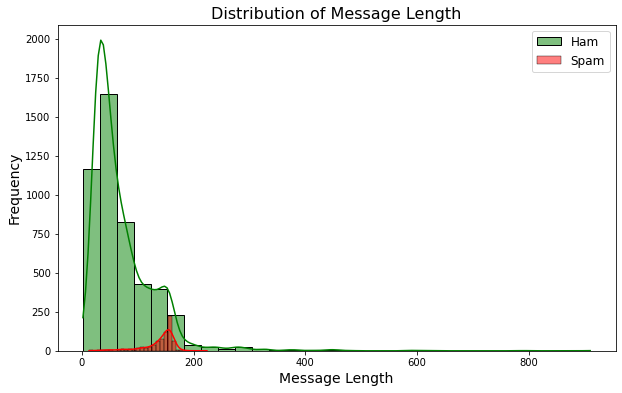

In [11]:
advanced_analyzer.plot_message_length_distribution()

The above visualizes the distribution of word counts in messages, distinguishing between 'ham' (non-spam) and 'spam' categories. This helps analyze the typical length of messages in each category, which could be useful for understanding patterns or trends in the data, such as whether spam messages tend to be longer or shorter than non-spam messages.

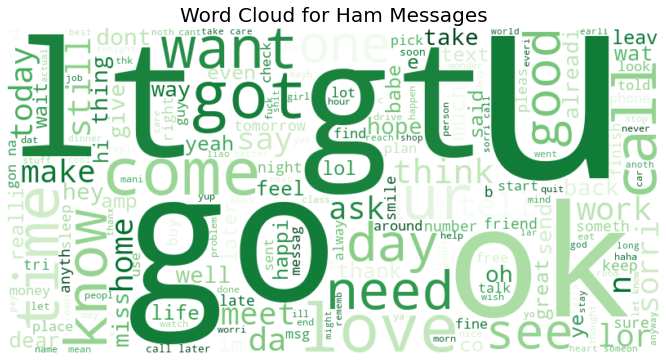

In [12]:
advanced_analyzer.generate_word_cloud('ham', colormap='Greens')

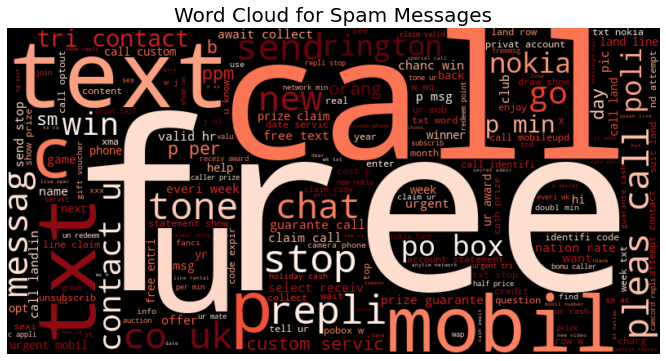

In [13]:
advanced_analyzer.generate_word_cloud('spam', colormap='Reds', bg_color='black')

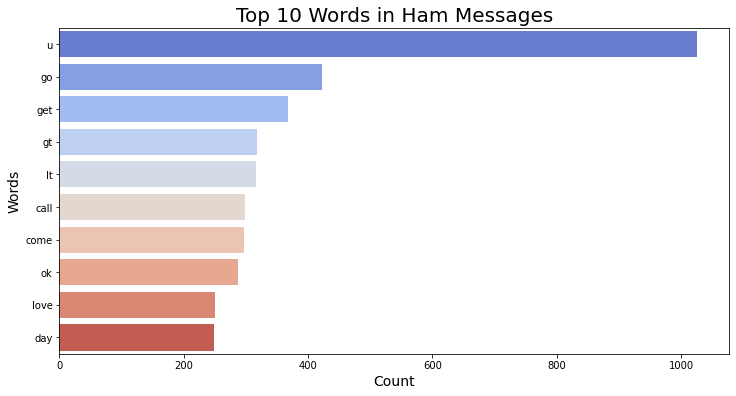

In [14]:
advanced_analyzer.plot_top_words('ham')

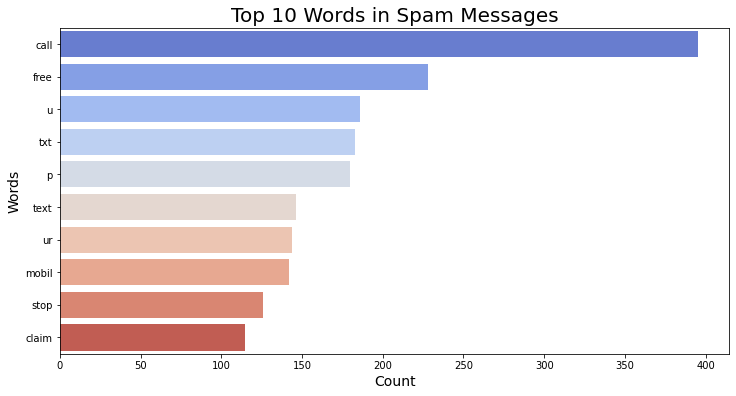

In [15]:
advanced_analyzer.plot_top_words('spam')

The bar plot shows the top 10 most common words from the email dataset, with each bar representing the frequency of a particular word. Here's an interpretation of the plot:

1. **Most Frequent Word**: 
   - The word "u" is the most common word, appearing around 1,200 times. Its frequency is significantly higher than the others.

2. **Other Common Words**:
   - Words like "call", "2", "im", "get", "ur", "go", "4", "dont", and "ok" follow, with "call" being the second most frequent.
   - The frequencies of these words gradually decrease, with "ok" being the least common among the top 10.

3. **Color Coding**:
   - The color gradient from purple to yellow (used in the `viridis` palette) visually represents the frequency distribution, where darker colors indicate higher frequencies.

### Overall Observations:
- The dataset seems to have a lot of informal language (e.g., "u", "im", "ur"), suggesting that these emails might be more casual or conversational.
- The words "2" and "4" being common might indicate frequent use of short forms or shorthand, common in text messaging.

##  Bivariate Analysis

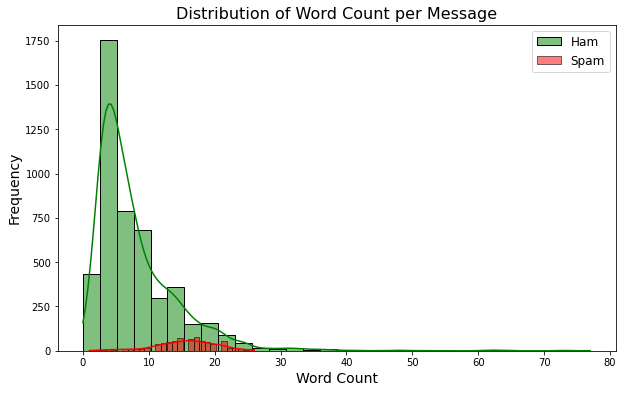

In [16]:
advanced_analyzer.plot_word_length_distribution()

####  Email Length vs. Email Type

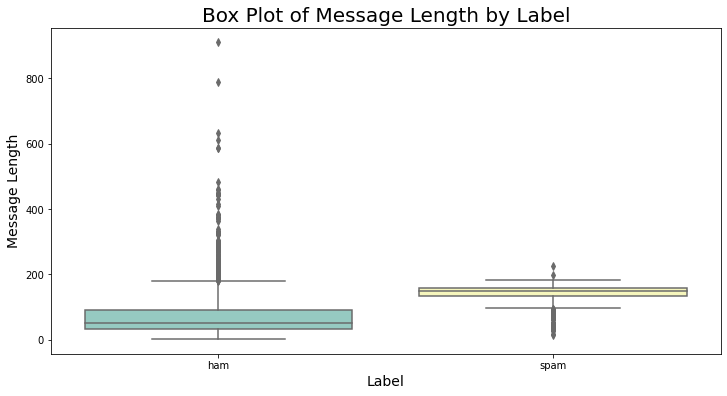

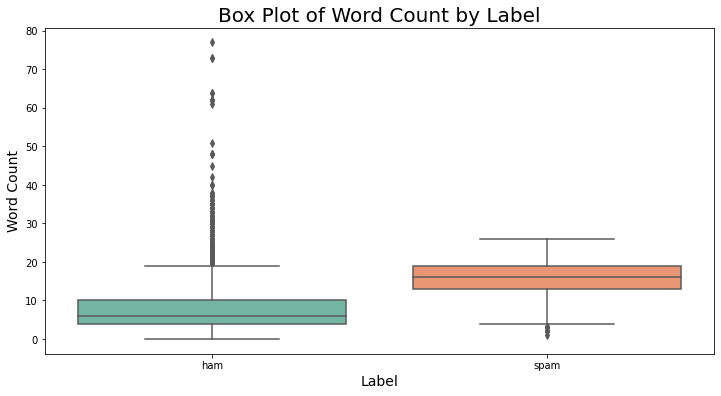

In [17]:
advanced_analyzer.plot_box_plots()

### Key Components of the Box Plot:
- **Boxes**: The boxes represent the interquartile range (IQR), which contains the middle 50% of the data.
  - The bottom of the box shows the 25th percentile (Q1).
  - The top of the box shows the 75th percentile (Q3).
  - The line inside the box represents the median (50th percentile).

- **Whiskers**: The lines extending from the boxes (whiskers) represent the range of the data, extending to the smallest and largest values within 1.5 times the IQR from Q1 and Q3, respectively.

- **Outliers**: Points outside the whiskers are considered outliers and are plotted individually. These outliers represent unusually long or short emails relative to the majority of the data.

### Interpretation:
1. **Not Spam Emails**:
   - The median length of "Not spam" emails is lower compared to "spam" emails, as indicated by the lower position of the line within the box.
   - The IQR (height of the box) shows that most "Not spam" emails are relatively short.
   - There are several outliers with significantly longer lengths, extending up to around 800+ characters.

2. **Spam Emails**:
   - The median length of "spam" emails is higher than that of "Not spam" emails, indicating that spam emails tend to be longer on average.
   - The IQR for spam emails is smaller, showing that the lengths of most spam emails are more consistent and clustered within a narrower range.
   - There are fewer outliers, and they do not reach as high as those in the "Not spam" category.

### Overall Observations:
- **Length Comparison**: Spam emails generally have a higher median length than non-spam emails, though non-spam emails show a wider range in length, including some very long outliers.
- **Outliers**: The presence of outliers, especially in the "Not spam" category, indicates that while most non-spam emails are short, there are a few that are unusually long.

This plot helps in understanding the typical length of emails in both categories and shows that spam emails are more consistently longer, while non-spam emails can vary more widely in length.

## TF-IDF Vectorization

In [33]:
class TFIDFVectorizer:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(max_features=5000)

    def fit_transform(self, data):
        return self.vectorizer.fit_transform(data)

    def transform(self, data):
        return self.vectorizer.transform(data)

In [34]:
# calling TF-IDF Vectorization
tfidf_vectorizer = TFIDFVectorizer()
X = tfidf_vectorizer.fit_transform(preprocessed_data['cleaned_message'])
y = preprocessed_data['label'].map({'ham': 0, 'spam': 1})

## Split data

In [35]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

In [36]:
class ModelCollection:
    def __init__(self):
        self.models = {
            'Naive Bayes': MultinomialNB(),
            'Logistic Regression': LogisticRegression(max_iter=1000),
            'SVC': SVC(probability=True),  # Changed to output probability for ROC
            'Decision Tree': DecisionTreeClassifier(),
            'KNN': KNeighborsClassifier()
        }
        self.trained_models = {}

    def train_all(self, X_train, y_train):
        for name, model in self.models.items():
            print(f"Training {name} model...")
            model.fit(X_train, y_train)
            self.trained_models[name] = model
        print("All models trained successfully.")

    def predict_all(self, X_test):
        predictions = {}
        for name, model in self.trained_models.items():
            predictions[name] = model.predict(X_test)
        return predictions

    def predict_proba_all(self, X_test):
        probas = {}
        for name, model in self.trained_models.items():
            probas[name] = model.predict_proba(X_test)[:, 1]
        return probas

In [37]:
# Train and evaluate models
model_collection = ModelCollection()
model_collection.train_all(X_train, y_train)
predictions = model_collection.predict_all(X_test)
probas = model_collection.predict_proba_all(X_test)

Training Naive Bayes model...
Training Logistic Regression model...
Training SVC model...
Training Decision Tree model...
Training KNN model...
All models trained successfully.


**Training** All five models are trained on the provided training data and stored for future use.

**Predictions** The class can produce predictions and probability estimates for the test data using each of the trained models.

**Outputs** The final output includes either the predicted classes or the probability of the positive class for each model, depending on the method called

## Model Evaluation

In [38]:
class ModelVisualizer:
    def __init__(self):
        sns.set_style('whitegrid')

    def plot_confusion_matrix(self, cm, model_name):
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
        plt.xlabel('Predicted Label', fontsize=14)
        plt.ylabel('True Label', fontsize=14)
        plt.show()

    def plot_classification_report(self, report, model_name):
        report_data = []
        lines = report.split('\n')
        for line in lines[2:-5]:
            row = {}
            row_data = line.strip().split()
            if len(row_data) < 2:
                continue
            row['class'] = row_data[0]
            row['precision'] = float(row_data[1])
            row['recall'] = float(row_data[2])
            row['f1_score'] = float(row_data[3])
            row['support'] = int(row_data[4])
            report_data.append(row)
        df = pd.DataFrame.from_dict(report_data)
        df.set_index('class', inplace=True)
        df[['precision', 'recall', 'f1_score']].plot(kind='bar', figsize=(10, 6), colormap='Set1')
        plt.title(f'Classification Report for {model_name}', fontsize=16)
        plt.xlabel('Classes', fontsize=14)
        plt.ylabel('Scores', fontsize=14)
        plt.ylim(0, 1)
        plt.legend(fontsize=12)
        plt.show()

    def plot_metric_comparison(self, metrics_dict):
        metrics_df = pd.DataFrame(metrics_dict).T
        metrics_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
        plt.title('Model Comparison Across Metrics', fontsize=18)
        plt.xlabel('Models', fontsize=14)
        plt.ylabel('Scores', fontsize=14)
        plt.ylim(0, 1)
        plt.legend(fontsize=12)
        plt.xticks(rotation=45)
        plt.show()

    def plot_roc_curves(self, y_test, probas_dict):
        plt.figure(figsize=(10, 8))
        for model_name, y_proba in probas_dict.items():
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=14)
        plt.ylabel('True Positive Rate', fontsize=14)
        plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=18)
        plt.legend(loc='lower right', fontsize=12)
        plt.show()



Naive Bayes Model Evaluation:
Accuracy: 0.9686
Precision: 1.0000
Recall: 0.7667
F1 Score: 0.8679


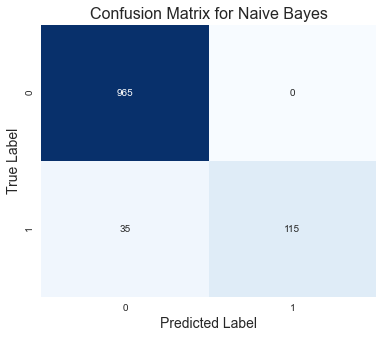

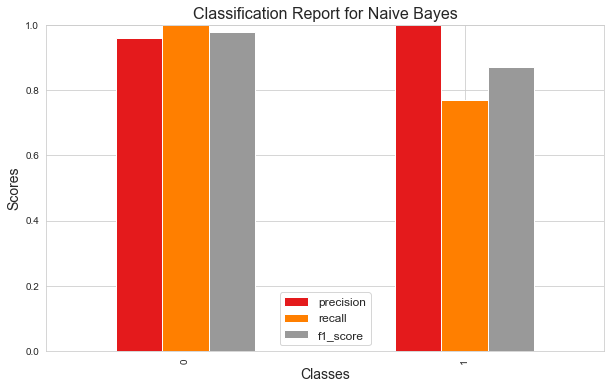


Logistic Regression Model Evaluation:
Accuracy: 0.9552
Precision: 0.9630
Recall: 0.6933
F1 Score: 0.8062


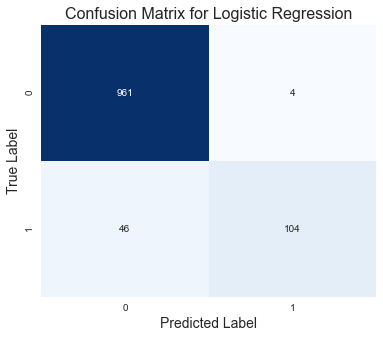

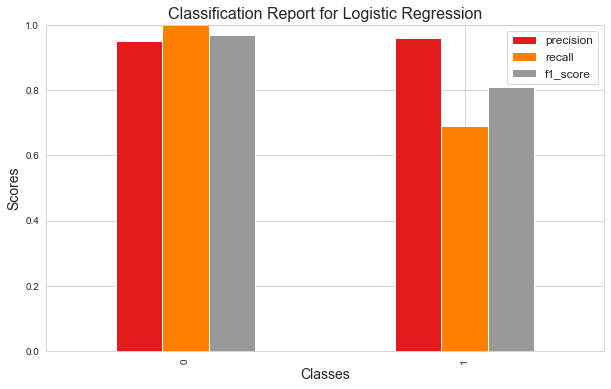


SVC Model Evaluation:
Accuracy: 0.9785
Precision: 0.9922
Recall: 0.8467
F1 Score: 0.9137


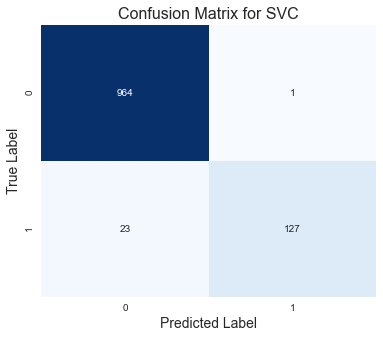

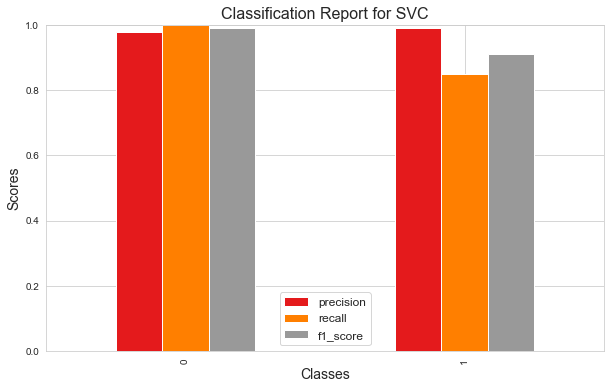


Decision Tree Model Evaluation:
Accuracy: 0.9713
Precision: 0.8933
Recall: 0.8933
F1 Score: 0.8933


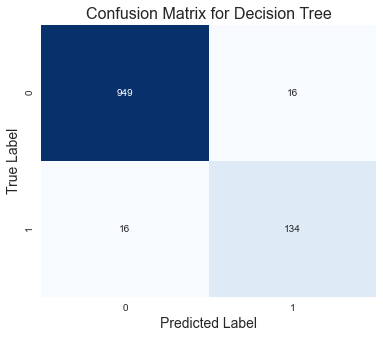

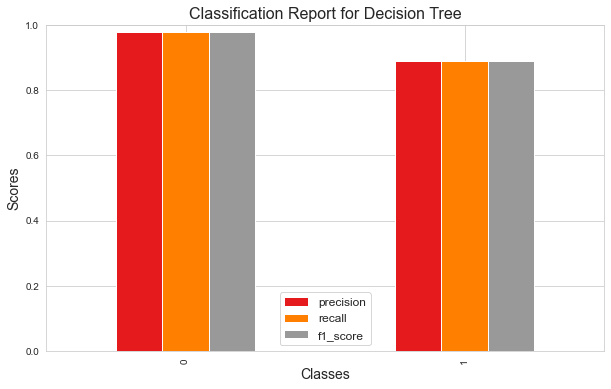


KNN Model Evaluation:
Accuracy: 0.9202
Precision: 1.0000
Recall: 0.4067
F1 Score: 0.5782


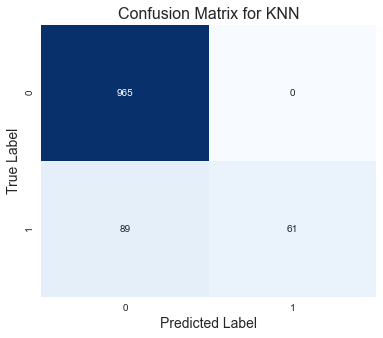

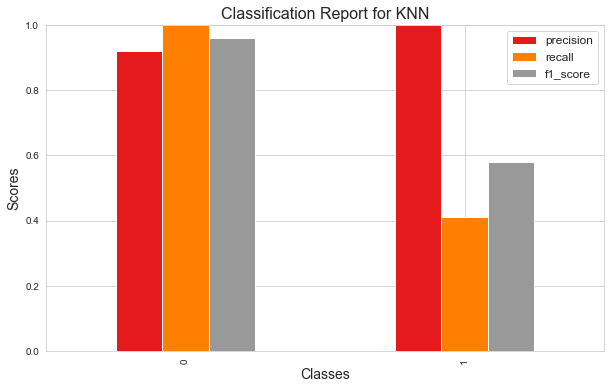

In [39]:
evaluator = ModelVisualizer()
metrics_summary = {}

for model_name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    metrics_summary[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    print(f"\n{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    evaluator.plot_confusion_matrix(cm, model_name)
    evaluator.plot_classification_report(report, model_name)

These represents classification model performance comparison of multiple models based on various metrics;

- ***A confusion matrix heatmap*** that provides insight into the model's predictive accuracy.

- A bar plot of classification metrics (***precision, recall, F1-score***) for each class, enabling detailed performance evaluation.

- ***ROC curves*** for different models, illustrating their ability to distinguish between classes while displaying the AUC for each, giving an indication of overall model effectiveness.

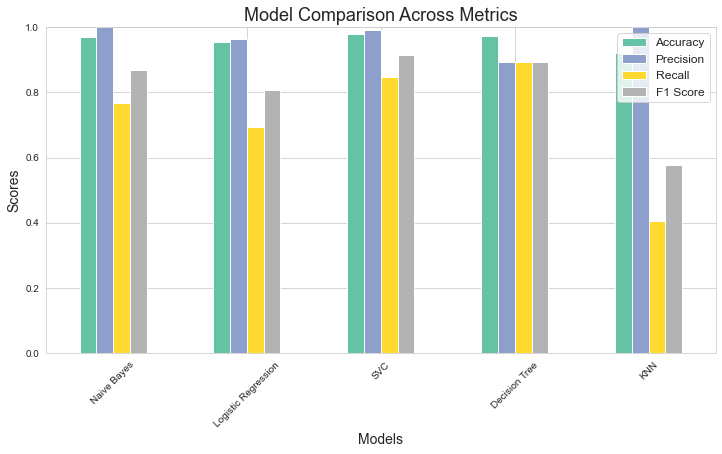

In [40]:
# Plot comparison of all models
evaluator.plot_metric_comparison(metrics_summary)

The plot presents a comparison of five machine learning models (**Naive Bayes, Logistic Regression, SVC, Decision Tree, and KNN**) across four evaluation metrics: **Accuracy, Precision, Recall, and F1 Score.



**Accuracy**: Decision Tree and KNN exhibit the highest accuracy, followed closely by SVC and Logistic Regression. Naive Bayes appears to have the lowest accuracy among the models.

**Precision**: KNN demonstrates the highest precision, followed by Decision Tree and SVC. Logistic Regression and Naive Bayes show lower precision values.

**Recall**: Decision Tree and KNN achieve the highest recall, with SVC and Logistic Regression showing moderate recall. Naive Bayes has the lowest recall score.

**F1 Score**: KNN and Decision Tree have the highest F1 scores, indicating a good balance between precision and recall. SVC and Logistic Regression have moderate F1 scores, while Naive Bayes has the lowest.

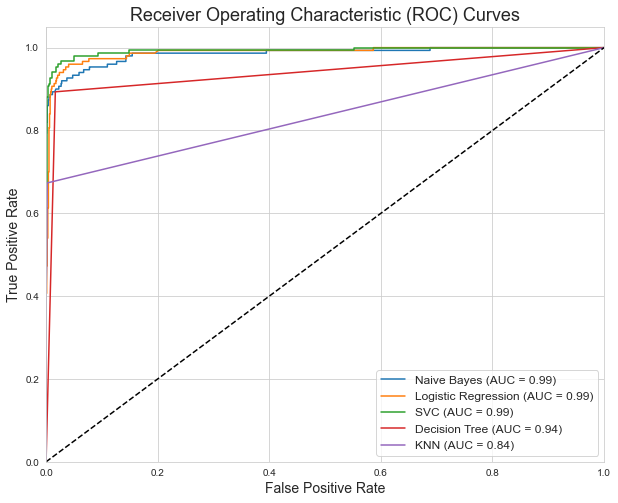

In [41]:
# Plot ROC curves
evaluator.plot_roc_curves(y_test, probas)

## Models Testing

In [53]:
class Predictor:
    def __init__(self, trained_models, vectorizer):
        self.trained_models = trained_models
        self.vectorizer = vectorizer

    def predict(self, new_messages):
        vectorized_messages = self.vectorizer.transform(new_messages)
        predictions = {}
        for name, model in self.trained_models.items():
            predictions[name] = model.predict(vectorized_messages)
        return predictions

In [54]:
# Predict new messages
new_messages = pd.Series(["Click here to claim your prize.", "Congratulations! You've won a prize.", "come here"])
predictor = Predictor(model_collection.trained_models, tfidf_vectorizer)
new_predictions = predictor.predict(new_messages)
new_predictions

{'Naive Bayes': array([1, 1, 0], dtype=int64),
 'Logistic Regression': array([0, 1, 0], dtype=int64),
 'SVC': array([1, 1, 0], dtype=int64),
 'Decision Tree': array([0, 0, 0], dtype=int64),
 'KNN': array([0, 1, 0], dtype=int64)}

Given the overall superior performance of the SVC model across various evaluation metrics, it has been chosen for deployment. This model demonstrated consistent accuracy and a good balance between precision and recall in previous evaluations

Saving the  SVC model as a pickle file for deployment. It was our best performing model overall

In [ ]:
# Save the vectorizer to a pickle file
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer.vectorizer, f)




In [ ]:
# Save the SVC model to a pickle file
import pickle
with open('spam_model.pkl', 'wb') as f:
    pickle.dump(model_collection.trained_models['SVC'], f)

## Conclusion & Recommendation

This project successfully built a machine learning model to classify emails as spam or non-spam (ham).



**Data Distribution**: The dataset is imbalanced, with significantly more non-spam emails than spam emails (6:1 ratio).This class imbalance was adressed during model training.The class imbalance in the dataset requires further attention during model training to prevent bias towards the majority class ("Not Spam"). Techniques like oversampling or undersampling can be explored to balance the classes.

**Spam Characteristics**: Spam emails tend to be longer than non-spam emails on average and contain more informal language and frequent short forms.

Five classification models were trained: **Naive Bayes, Logistic Regression, SVC, Decision Tree,** and **KNN**.

**Model Performance**: All models achieved high accuracy in classifying emails (ranging from 92% to 98%). However, there are trade-offs between precision and recall.
- Naive Bayes and KNN have perfect precision (100%) but lower recall (identifying spam emails), especially for KNN.
- SVC has the highest overall performance (accuracy, precision, recall, F1-score).SVC emerged as the best performing model based on accuracy. However, depending on the specific needs (e.g., prioritizing high precision to avoid misclassifying legitimate emails as spam), other models might be suitable alternatives.
- Logistic Regression and Decision Tree offer a good balance between precision and recall.
- All models achieved high accuracy in spam detection, with SVC performing the best (accuracy: 0.9785). However, some models exhibited trade-offs between precision and recall. For example, Naive Bayes and KNN had high precision (identifying most spam emails correctly) but lower recall (missing some spam emails).
- The project visualized the performance using confusion matrices and classification reports, offering valuable insights into model behavior.


Machine learning can be effective for spam detection. By analyzing various email features, the model can learn to identify spam emails with good accuracy